In [1]:
import pandas as pd
import numpy as np
movies = ['mib', 'st', 'av', 'b', 'ss', 'lm']
users = ['Sara', 'Jesper', 'Therese', 'Helle', 'Pietro', 'Ekaterina']
M = pd.DataFrame([
[5.0, 3.0, 0.0, 2.0, 2.0, 2.0],
[4.0, 3.0, 4.0, 0.0, 3.0, 3.0],
[5.0, 2.0, 5.0, 2.0, 1.0, 1.0],
[3.0, 5.0, 3.0, 0.0, 1.0, 1.0],
[3.0, 3.0, 3.0, 2.0, 4.0, 5.0],
[2.0, 3.0, 2.0, 3.0, 5.0, 5.0]],
columns=movies,
index=users)

In [2]:
M['mib']['Sara']

5.0

In [3]:
from numpy import linalg
U, Sigma, Vt = linalg.svd(M)

In [4]:
print(U)

[[-0.34319044  0.05271269  0.91229351  0.10802653  0.1883775  -0.0025359 ]
 [-0.43025496  0.15728977 -0.30930294 -0.1223809   0.74499138  0.35282154]
 [-0.38737301  0.55681217 -0.18583669  0.63246613 -0.32397065  0.01991734]
 [-0.33263916  0.41895744  0.01688732 -0.7564373  -0.37197746 -0.05455319]
 [-0.47548048 -0.33867038 -0.18449364  0.02668085  0.09615225 -0.78436322]
 [-0.45859858 -0.61009716 -0.0565144   0.02074898 -0.3961468   0.50686499]]


In [5]:
print(Sigma)

[17.26966149  5.84468211  3.56288086  3.13238351  1.66833703  0.55604707]


In [6]:
print(Vt)

[[-0.50466496 -0.43779174 -0.40530273 -0.21933745 -0.39908557 -0.42661827]
 [ 0.46152214  0.16974683  0.41642757 -0.22047094 -0.48798258 -0.54592763]
 [ 0.49937807  0.22417556 -0.780897    0.25664152 -0.08218567 -0.13396782]
 [ 0.34005042 -0.77194502  0.16761538  0.50970577 -0.02062088 -0.01210314]
 [ 0.4089285  -0.3642583  -0.15563818 -0.759632    0.1916016   0.24923518]
 [-0.00867891 -0.02620111  0.01412401 -0.0240422   0.74747096 -0.66313485]]


In [7]:
def rank_k(k):
    U_reduced= np.mat(U[:,:k])
    Vt_reduced = np.mat(Vt[:k,:])
    Sigma_reduced = Sigma_reduced = np.eye(k)*Sigma[:k]
    return U_reduced, Sigma_reduced, Vt_reduced,
U_reduced, Sigma_reduced, Vt_reduced = rank_k(6)
M_hat = U_reduced * Sigma_reduced * Vt_reduced
print(M_hat)
U_reduced, Sigma_reduced, Vt_reduced = rank_k(4)
M_hat = U_reduced * Sigma_reduced * Vt_reduced
print(M_hat)

[[ 5.00000000e+00  3.00000000e+00 -2.07785520e-15  2.00000000e+00
   2.00000000e+00  2.00000000e+00]
 [ 4.00000000e+00  3.00000000e+00  4.00000000e+00 -4.38989097e-16
   3.00000000e+00  3.00000000e+00]
 [ 5.00000000e+00  2.00000000e+00  5.00000000e+00  2.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00  5.00000000e+00  3.00000000e+00 -1.92963552e-15
   1.00000000e+00  1.00000000e+00]
 [ 3.00000000e+00  3.00000000e+00  3.00000000e+00  2.00000000e+00
   4.00000000e+00  5.00000000e+00]
 [ 2.00000000e+00  3.00000000e+00  2.00000000e+00  3.00000000e+00
   5.00000000e+00  5.00000000e+00]]
[[ 4.87147087  3.11444112  0.04893344  2.23870109  1.94083799  1.920736  ]
 [ 3.49344678  3.45787572  4.19067126  0.94886084  2.61521613  2.82032378]
 [ 5.22111879  1.8034114   4.91572235  1.58969108  1.09528095  1.14205388]
 [ 3.25351113  4.77315242  2.90384191 -0.4721446   1.14157873  1.13455568]
 [ 2.93061675  3.04700483  3.03112668  2.11137004  4.29526848  4.67079756]
 [ 2.27270952  2.7

In [8]:
def rank_k2(k):
    U_reduced= np.mat(U[:,:k])
    Vt_reduced = np.mat(Vt[:k,:])
    Sigma_reduced = Sigma_reduced = np.eye(k)*Sigma[:k]
    Sigma_sqrt = np.sqrt(Sigma_reduced)
    return U_reduced*Sigma_sqrt, Sigma_sqrt*Vt_reduced
U_reduced, Vt_reduced = rank_k2(4)
M_hat = U_reduced * Vt_reduced
print(M_hat)

[[ 4.87147087  3.11444112  0.04893344  2.23870109  1.94083799  1.920736  ]
 [ 3.49344678  3.45787572  4.19067126  0.94886084  2.61521613  2.82032378]
 [ 5.22111879  1.8034114   4.91572235  1.58969108  1.09528095  1.14205388]
 [ 3.25351113  4.77315242  2.90384191 -0.4721446   1.14157873  1.13455568]
 [ 2.93061675  3.04700483  3.03112668  2.11137004  4.29526848  4.67079756]
 [ 2.27270952  2.76664391  1.89315701  2.50473044  4.91596291  5.35161957]]


## Получаем прогноз

In [12]:
M_hat[1,2]

4.190671259263001

In [19]:
## Прогноз оценки для Джаспера для фильма ЭЙС-ВЕнтура
Jesper = 1
AceVentura = 2
print(U_reduced[Jesper]*Vt_reduced[:,AceVentura])

[[4.19067126]]


Может быть, заполнение пробелов нулями было не очень хорошей идеей. Чтобы сделать предсказания лучше, вы можете выполнить так называемое вменение. Оба метода называются вменением. Это решение упрощает работу, но вы можете добиться еще лучших результатов с помощью базовых предикторов, о которых мы поговорим в ближайшее время. В следующем листинге мы заполняем ячейки средними оценками.

Что делать с данными, которые нам неизвестны? В рассмотренном ранее
примере было всего несколько неизвестных, но часто возникает ситуация,
когда заполнен только 1 % клеток в матрице оценок. Надо что-то с этим де-
лать. Есть два распространенных способа подойти к этой проблеме:
1. вы можете вычислить среднее значение каждого элемента (или пользователя) и заполнить средним значением нулевые ячейки матрицы;
2. вы можете нормализовать каждую строку так, чтобы ноль оказался средним значением.

Оба метода называются вменением. Это решение упрощает работу, но вы
можете добиться еще лучших результатов с помощью базовых предикторов,
о которых мы поговорим в ближайшее время. В следующем листинге мы за-
полняем ячейки средними оценками.

Воспользуемся вменением 1

In [23]:
r_average = M[M > 0.0].mean()
M[M == 0] = np.NaN
M.fillna(r_average, inplace=True)

In [24]:
U, Sigma, Vt = linalg.svd(M)

In [25]:
U_reduced, Vt_reduced = rank_k2(4)
M_hat = U_reduced * Vt_reduced
print(M_hat)

[[4.96527904 3.05025112 3.4699645  1.83793044 1.92302433 2.10555193]
 [4.01735702 2.96224212 3.9546778  2.38970844 2.89013078 3.06685268]
 [4.98346886 2.02958029 5.03794119 1.89657357 1.0297349  0.99672747]
 [3.01306011 4.98240471 2.97475285 2.30489446 1.04428991 0.94793143]
 [3.09822111 2.86285057 2.80617696 2.43523214 4.27650203 4.65403727]
 [1.91727352 3.1213695  2.1680414  2.60623179 4.83585754 5.23595875]]


In [29]:
## Прогноз оценки для Джаспера для фильма ЭЙС-ВЕнтура
Jesper = 1
AceVentura = 2
print(U_reduced[Jesper]*Vt_reduced[:,AceVentura])

[[3.9546778]]


In [28]:
## Прогноз оценки для Сары для фильма ЭЙС-ВЕнтура
Sara = 0
AceVentura = 2
print(U_reduced[Sara]*Vt_reduced[:,AceVentura])

[[3.4699645]]


## Добавление новых пользователей путем складывания
Допустим мы хотим добавить пользователя Ким, его оценки: [4.0, 5.0, 0.0, 3.0, 3.0, 0.0]
Нам не нужно заново вычислять SVD, мы можем воспользоваться формулой: 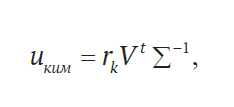

In [37]:
from numpy.linalg import inv
r_kim = np.array([4.0, 5.0, 0.0, 3.0, 3.0, 0.0])

# делаем вменение
r_kim_average = r_kim[r_kim > 0.0].mean()
print(r_kim_average)
r_kim[r_kim == 0] = np.NaN
np.nan_to_num(r_kim,copy=False,nan=r_kim_average)
print(r_kim)

u_kim = r_kim *Vt_reduced.T* inv(Sigma_reduced)
print(u_kim)

3.75
[4.   5.   3.75 3.   3.   3.75]
[[-2.28405307 -0.05669486 -0.63756391 -0.01321692]]


In [38]:
## Прогноз оценки для Кима для фильма ЭЙС-ВЕнтура
AceVentura = 2
print(u_kim*Vt_reduced[:,AceVentura])

[[4.04926919]]


## Добавление нового элемента
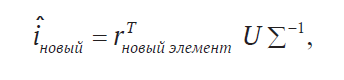

## Как формировать рекомендации с помощью SVD
рассчитать все прогнозы оценок и взять самые большие из них либо перебрать все элементы и найти подобные в сокращенном пространстве.

## Недостатки SVD
У SVD, который мы рассмотрели, есть несколько проблем: 
    во-первых, нужно что-то делать с незаполненными ячейками в матрице оценок. Плюс обрабатывать большие матрицы очень долго.Зато есть возможность добавлять новых пользователей по мере их появления, но вы должны иметь в виду, что модель SVD является статической и ее нужно обновлять как можно чаще.
    Кроме того, метод SVD не совсем интуитивно понятен. Люди любят знать,
почему та или иная вещь попала в рекомендации, но подход SVD затрудняет
понимание того, почему машина предсказывает высокие оценки для того или
иного элемента.

## Базисные предикты
базисным предиктором, который упрощает добавление значений в пустые ячейки
матрицы. Хотя их можно использовать в качестве рекомендательный систе-
мы, здесь это будет способ сделать матричную факторизацию лучше.

Кроме типов элементов и вкусов пользователей, есть и другие стоящие
упоминания аспекты. Если фильм считается хорошим, то средняя оценка это-
го фильма, вероятно, немного выше средней для всех фильмов, и наоборот,
оценка плохого фильма ниже средней. Если у вас есть такая информация, вы
можете добавить элементу чуть более высокую оценку. В то же время неко-
торые пользователи критикуют фильмы больше, чем другие (я же не сказал
«сварливые старикашки»), или, наоборот, более позитивны. Элементы с оцен-
ками выше или ниже среднего уровня имеют, так сказать, отклонение. То же
самое относится и к пользователям. Можно сказать, что пользователи имеют
отклонение по сравнению с глобальным средним.
Если бы вы могли извлечь значения отклонений элементов и пользовате-
лей, то можно было бы рассчитать базис для прогнозов, что будет лучше, чем
среднее, при заполнении пустых ячеек в матрице оценок. Используя эти от-
клонения, вы можете создавать базисные предикторы. Базисный предиктор –
это сумма глобального среднего плюс отклонение элемента плюс отклонение
пользователя. С точки зрения математики это выглядит вот так:

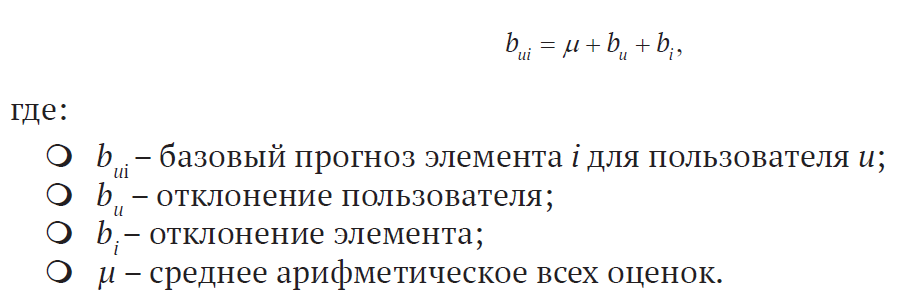

In [8]:
## Вычисление предиктов
global_mean = M[M>0].mean().mean()
print(global_mean)
M_minus_mean = M[M>0]-global_mean
user_bias = M_minus_mean.T.mean()
print(user_bias)
item_bias = M_minus_mean.apply(lambda r: r - user_bias).mean()
print(item_bias)

2.997222222222222
Sara        -0.197222
Jesper       0.402778
Therese     -0.330556
Helle       -0.397222
Pietro       0.336111
Ekaterina    0.336111
dtype: float64
mib    0.644444
st     0.144444
av     0.333333
b     -0.783333
ss    -0.355556
lm    -0.188889
dtype: float64


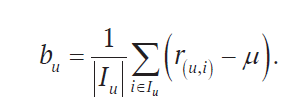
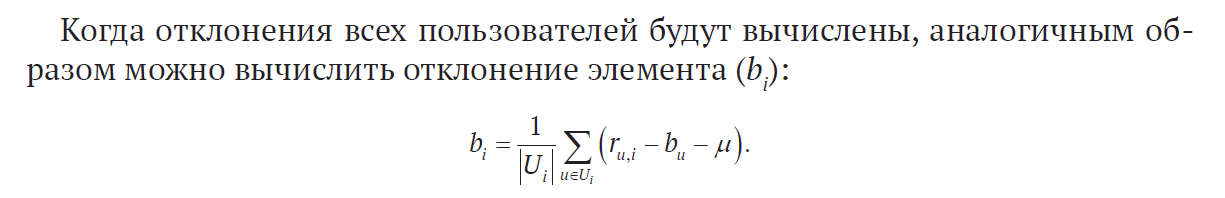
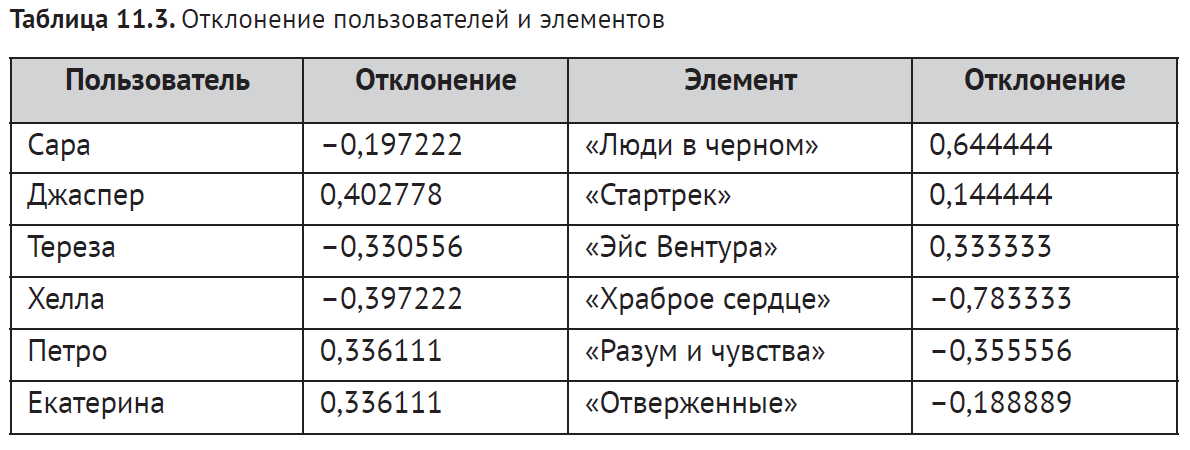

In [9]:
for rowIndex, row in M.iterrows(): #iterate over rows
    for columnIndex, value in row.items():
        if (value == 0):
            M.loc[rowIndex][columnIndex]=global_mean +user_bias[rowIndex]+item_bias[columnIndex]
print(M)

           mib   st        av         b   ss   lm
Sara       5.0  3.0  3.133333  2.000000  2.0  2.0
Jesper     4.0  3.0  4.000000  2.616667  3.0  3.0
Therese    5.0  2.0  5.000000  2.000000  1.0  1.0
Helle      3.0  5.0  3.000000  1.816667  1.0  1.0
Pietro     3.0  3.0  3.000000  2.000000  4.0  5.0
Ekaterina  2.0  3.0  2.000000  3.000000  5.0  5.0


In [11]:
from numpy import linalg
U, Sigma, Vt = linalg.svd(M)

In [12]:
def rank_k2(k):
    U_reduced= np.mat(U[:,:k])
    Vt_reduced = np.mat(Vt[:k,:])
    Sigma_reduced = Sigma_reduced = np.eye(k)*Sigma[:k]
    Sigma_sqrt = np.sqrt(Sigma_reduced)
    return U_reduced*Sigma_sqrt, Sigma_sqrt*Vt_reduced
U_reduced, Vt_reduced = rank_k2(4)
M_hat = U_reduced * Vt_reduced
print(M_hat)

[[5.00022367 3.01247688 3.15369294 1.92488441 1.9679249  2.05109349]
 [4.00063111 3.02312751 4.03656403 2.48157982 2.91661208 3.11505533]
 [4.99997808 2.00522891 5.00916029 1.96630301 0.99934355 1.01054245]
 [2.99983006 4.99170729 2.98658353 1.86618423 1.02367005 0.96404176]
 [2.99825846 2.90374003 2.84301043 2.57921747 4.24921703 4.60431781]
 [2.00109827 3.06618    2.10847013 2.59988154 4.83961109 5.26272637]]


In [ ]:
M_hat[1][2]

In [13]:
## Прогноз оценки для Джаспера для фильма ЭЙС-ВЕнтура
Jesper = 1
AceVentura = 2
print(U_reduced[Jesper]*Vt_reduced[:,AceVentura])

[[4.03656403]]


## Funk SVD
В методе SVD большое значение возложено на матрицу оценок, но это доволь-
но разреженная матрица, и не следует полагаться на него слишком сильно
в том смысле, что заполненных ячеек может быть менее 1 %. Вместо того что-
бы применять всю матрицу, Саймон Фанк придумал метод, который исполь-
зует только то, что нужно знать. Вам понадобятся знания математики, чтобы
оценить его, но там много картинок, так что вы справитесь. Метод Funk SVD
также часто называют регуляризованным SVD.

0. RMSE (корень средней квадратичной ошибки), насколько мы близки к известным оценкам
1. используем градиентный спуск, который движется по RMSE
2. использованию базисных предикторов
3. Funk SVD

Нам нужно создать две
матрицы U и V, при перемножении которых мы окажемся как можно ближе
к исходной матрице. В идеале вы хотите найти такие u и v, чтобы было вер-
но следующее:

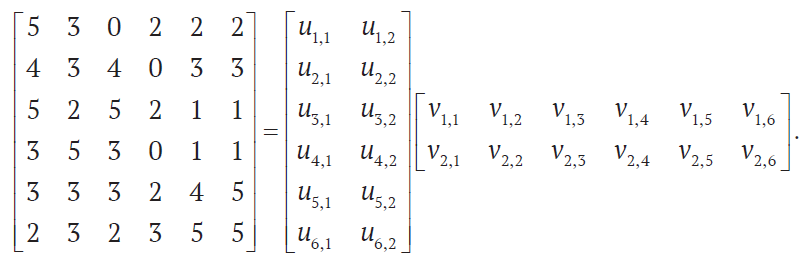
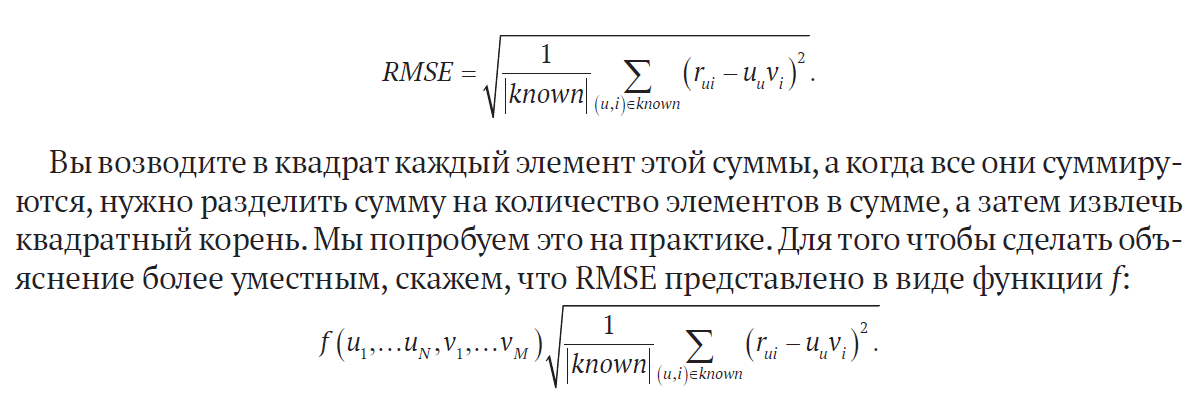

In [ ]:
    def meta_parameter_train(ratings_df):

        # k это количество факторов
        for k in [15, 20, 30, 40, 50, 75, 100]:
            self.initialize_factors(ratings_df, k)
#             self.logger.info("Training model with {} factors".format(k))
#             self.log(str(k), "factor, iterations, train_mse, test_mse, time")

            # разделяем данные на тестовую и обучающую выборку
            test_data, train_data = self.split_data(10,
                                                    ratings_df)
            columns = ['user_id', 'movie_id', 'rating']
            ratings = train_data[columns].as_matrix()
            test = test_data[columns].as_matrix()

#             Сколько эпох обучается каждый фактор
            self.MAX_ITERATIONS = 10
            iterations = 0
#             перемешиваем индексы
            index_randomized = random.sample(range(0, len(ratings)), (len(ratings) - 1))

            for factor in range(k):
                factor_iteration = 0
                factor_time = datetime.now()

                last_err = sys.maxsize
                last_test_mse = sys.maxsize
                finished = False

                while not finished:
                    train_mse = self.stocastic_gradient_descent(factor,
                                                                index_randomized,
                                                                ratings)

                    iterations += 1
                    test_mse = self.calculate_rmse(test, factor)

                    finished = self.finished(factor_iteration,
                                             last_err,
                                             train_mse,
                                             last_test_mse,
                                             test_mse)

                    last_err = train_mse
                    last_test_mse = test_mse
                    factor_iteration += 1

                    self.log(str(k), f"{factor}, {iterations}, {train_mse}, {test_mse}, {datetime.now() - factor_time}")

            self.save(k, False)

In [ ]:
    def train(self, ratings_df, k=40):

        self.initialize_factors(ratings_df, k)
        self.logger.info("training matrix factorization at {}".format(datetime.now()))

        ratings = ratings_df[['user_id', 'movie_id', 'rating']].as_matrix()

        index_randomized = random.sample(range(0, len(ratings)), (len(ratings) - 1))

        for factor in range(k):
            factor_time = datetime.now()
            iterations = 0
            last_err = sys.maxsize
            iteration_err = sys.maxsize
            finished = False

            while not finished:
                start_time = datetime.now()
                iteration_err = self.stocastic_gradient_descent(factor,
                                                              index_randomized,
                                                              ratings)


                iterations += 1
                self.logger.info("epoch in {}, f={}, i={} err={}".format(datetime.now() - start_time,
                                                                       factor,
                                                                       iterations,
                                                                       iteration_err))
                finished = self.finished(iterations,
                                         last_err,
                                         iteration_err)
                last_err = iteration_err
            self.save(factor, finished)
            self.logger.info("finished factor {} on f={} i={} err={}".format(factor,
                                                                  datetime.now() - factor_time,
                                                                  iterations,
                                                                  iteration_err))

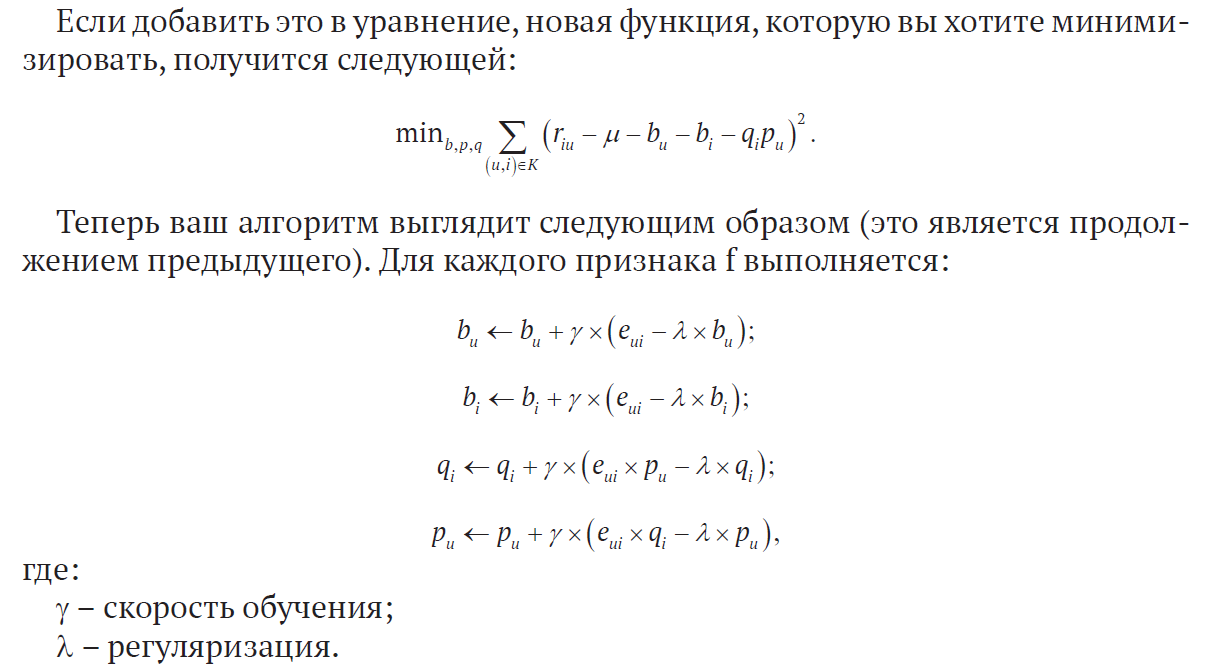
u - глобальное-средние
bu - отклонение пользователя
bi - отклонение жлемента
qi - строка матрицы факторов элементов
pu - колонка матрицы факторов пользователей
Факторы это неявные зависимости между данными
регуляризация – как сильно алгоритм регулирует ошибки? Должен ли он
быть одинаковым для всех выражений, или нужно разделить его на при-
знаки и отклонения?

FUNC: stocastic_gradient_descent

INPUTS:
factor:number 
index_randomized:
ratings: matrix_user_items
u_inx
i_inx

CHANGED INPUTS:
user_bias
item_bias
user_factors
item_factors

USE:
predict
calculate_rmse

OUTPUT:
CALL calculate_rmse

FUNC: calculate_rmse

INPUTS: 
ratings: matrix_user_items
factor:number
u_inx
i_inx
item_factors
user_factors
all_movies_mean
user_bias
item_bias

OUTPUT: number

FUNC:PREDICT
INPUTS:
u:number - index of user
i:index of element
item_factors
user_factors
all_movies_mean
user_bias
item_bias

OUTPUT: number from 1 to 10 included

FUNC Train
Inputs:
df: DataFrame
k: factors number

Use:
initialize_factors
stocastic_gradient_descent
finished

FUNC: finished
Inputs:
iterations: number of iteration
last_err:number
current_err: number
MAX_ITERATIONS:number

OUTPUT: boolean

FUNC: initialize_factors
Inputs:
rarings
k

u_inx
i_inx
item_factors
user_factors
all_movies_mean
user_bias
item_bias

Use:
calculate_all_movies_mean

OUTPUT:VOID

In [ ]:
FUNC: calculate_all_movies_mean
inputs: ratings
output: number

In [ ]:
    def stocastic_gradient_descent(self, factor, index_randomized, ratings):
        
        lr = Decimal(0.002)
        b_lr = Decimal(0.005)
        r = Decimal(0.002)
        bias_r = Decimal(0.002)

        for inx in index_randomized:
            rating_row = ratings[inx]

            u = self.u_inx[rating_row[0]]
            i = self.i_inx[rating_row[1]]
            rating = Decimal(rating_row[2])

            err = (rating - self.predict(u, i))

            self.user_bias[u] += b_lr * (err - bias_r * self.user_bias[u])
            self.item_bias[i] += b_lr * (err - bias_r * self.item_bias[i])

            user_fac = self.user_factors[u][factor]
            item_fac = self.item_factors[i][factor]

            self.user_factors[u][factor] += lr * (err * item_fac
                                                  - r * user_fac)
            self.item_factors[i][factor] += lr * (err * user_fac
                                                  - r * item_fac)
        return self.calculate_rmse(ratings, factor)

    def finished(self, iterations, last_err, current_err,
                 last_test_mse=0.0, test_mse=0.0):

        if last_test_mse < test_mse or iterations >= self.MAX_ITERATIONS or last_err - current_err < 0.01:
            self.logger.info('Finish w iterations: {}, last_err: {}, current_err {}, lst_rmse {}, rmse {}'
                             .format(iterations, last_err, current_err, last_test_mse, test_mse))
            return True
        else:
#             self.iterations += 1
            return False
        
        

In [ ]:
    def calculate_rmse(self, ratings, factor):

        def difference(row):
            user = self.u_inx[row[0]]
            item = self.i_inx[row[1]]

            pq = np.dot(self.item_factors[item][:factor + 1], self.user_factors[user][:factor + 1].T)
            b_ui = self.all_movies_mean + self.user_bias[user] + self.item_bias[item]
            prediction = b_ui + pq
            MSE = (prediction - Decimal(row[2])) ** 2
            return MSE

        squared = np.apply_along_axis(difference, 1, ratings).sum()
        return math.sqrt(squared / ratings.shape[0])

In [ ]:
    def predict(self, user, item):

        pq = np.dot(self.item_factors[item], self.user_factors[user].T)
        b_ui = self.all_movies_mean + self.user_bias[user] + self.item_bias[item]
        prediction = b_ui + pq

#         нормализация прогноза от 1 до 10 включительно
        if prediction > 10:
            prediction = 10
        elif prediction < 1:
            prediction = 1
        return prediction

In [ ]:
    def initialize_factors(self, ratings, k=25):
        self.user_ids = set(ratings['user_id'].values)
        self.movie_ids = set(ratings['movie_id'].values)
        self.item_counts = ratings[['movie_id', 'rating']].groupby('movie_id').count()
        self.item_counts = self.item_counts.reset_index()

        self.item_sum = ratings[['movie_id', 'rating']].groupby('movie_id').sum()
        self.item_sum = self.item_sum.reset_index()

        self.u_inx = {r: i for i, r in enumerate(self.user_ids)}
        self.i_inx = {r: i for i, r in enumerate(self.movie_ids)}

        self.item_factors = np.full((len(self.i_inx), k), Decimal(0.1))
        self.user_factors = np.full((len(self.u_inx), k), Decimal(0.1))

        self.all_movies_mean = calculate_all_movies_mean(ratings)
        self.logger.info("user_factors are {}".format(self.user_factors.shape))
        self.user_bias = defaultdict(lambda: 0)
        self.item_bias = defaultdict(lambda: 0)

In [ ]:
def calculate_all_movies_mean(ratings):
    avg = ratings['rating'].sum() / ratings.shape[0]
    return Decimal(avg)

## FunkSVD
У алгортима SVD есть два серьёзных минуса:
1. Он медленный, а значит чтобы применить к реальной матрице пользователь-элемент в которой будут тычсичи (если не миллионы) строк и колонок, будет почти невозможно.
2. Проблема разряженности, в реальности у каждого пользователя будет максимум 1% оцененных товаров, и заполнять остальные товары среднеми значениями (используя даже продвинутую технику базисных предикатов) не очень правильно.

Чтобы решить эту проблем был разработан FunkSVD. FunkSVD - принимает на вход не матрицу пользователей-товаров.А список всех оценок, то есть он принимает только выставленные оценки, и ему не нужно заполнять пропуски. Во вторых мы работаем со списком, а не с бесконечной матрицей, это должно повысить производительность.

In [1]:
## Преобразуем исходную матрицу M в список M_df
import pandas as pd
import numpy as np
import random
from decimal import Decimal
from collections import defaultdict
from datetime import datetime
import sys
import math
movies = ['mib', 'st', 'av', 'b', 'ss', 'lm']
users = ['Sara', 'Jesper', 'Therese', 'Helle', 'Pietro', 'Ekaterina']
M = pd.DataFrame([
[5.0, 3.0, 0.0, 2.0, 2.0, 2.0],
[4.0, 3.0, 4.0, 0.0, 3.0, 3.0],
[5.0, 2.0, 5.0, 2.0, 1.0, 1.0],
[3.0, 5.0, 3.0, 0.0, 1.0, 1.0],
[3.0, 3.0, 3.0, 2.0, 4.0, 5.0],
[2.0, 3.0, 2.0, 3.0, 5.0, 5.0]],
columns=movies,
index=users)

M_df = pd.DataFrame([
    [0,0,5.0],
    [0,1,3.0],
    [0,3,2.0],
    [0,4,2.0],
    [0,5,2.0],
    
    [1,0,4.0],
    [1,1,3.0],
    [1,2,4.0],
    [1,4,3.0],
    [1,5,3.0],
    
     [2,0,5.0],
    [2,1,2.0],
    [2,2,5.0],
     [2,3,2.0],
    [2,4,1.0],
    [2,5,1.0],
    
      [3,0,3.0],
    [3,1,5.0],
    [3,2,3.0],
    [3,4,1.0],
    [3,5,1.0],
    
      [4,0,3.0],
    [4,1,3.0],
    [4,2,3.0],
     [4,3,2.0],
    [4,4,4.0],
    [4,5,5.0],
    
      [5,0,2.0],
    [5,1,3.0],
    [5,2,2.0],
     [5,3,3.0],
    [5,4,5.0],
    [5,5,5.0],
],columns=['user_id','movie_id','rating'])

M_df.head()
# оценка сары для mib
M_df.at[0, 'rating']

5.0

In [2]:
def my_calculate_all_movies_mean(ratings):
    avg = ratings['rating'].sum() / ratings.shape[0]
    return Decimal(avg)

In [3]:
def my_initialize_factors(ratings, k=25):
        user_ids = set(ratings['user_id'].values)
        movie_ids = set(ratings['movie_id'].values)
        item_counts = ratings[['movie_id', 'rating']].groupby('movie_id').count()
        item_counts = item_counts.reset_index()
        print("ITEM COUNTS")
        print(item_counts)

        item_sum = ratings[['movie_id', 'rating']].groupby('movie_id').sum()
        item_sum = item_sum.reset_index()
        print(item_sum)

        #{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}
        u_inx = {r: i for i, r in enumerate(user_ids)}
#         print(u_inx)
        i_inx = {r: i for i, r in enumerate(movie_ids)}
#         print(i_inx)
#         i_inx строк, k колонок
        item_factors = np.full((len(i_inx), k), Decimal(0.1))
        user_factors = np.full((len(u_inx), k), Decimal(0.1))
#         print(item_factors)
#         print(user_factors)
        all_movies_mean = my_calculate_all_movies_mean(ratings)
        print("ALL MOVIES MEAN")
        print(all_movies_mean)
        user_bias = defaultdict(lambda: 0)
#         print(user_bias)
        item_bias = defaultdict(lambda: 0)
#         print(item_bias)
        
        return u_inx, i_inx, all_movies_mean, user_bias, item_bias, item_factors, user_factors

In [80]:
# стохастический градиентный спуск добавляет только один фактор (один для пользователя и один для элемента) за раз, новые факторы вычисляются на основе предыдущих
def my_stocastic_gradient_descent(factor, index_randomized, ratings, u_inx,i_inx,user_factors,item_factors,all_movies_mean,user_bias,item_bias):

#     Параметры нужно подбирать чтобы RMSE была минимальной
    #         скорость обучения
        lr = Decimal(0.2)
#     скорость обучения для отклонения
        b_lr = Decimal(0.5)
# регуляризация - сила штрафа
        r = Decimal(0.3)
    # регуляризация для отклонения - сила штрафа для отклонения
        bias_r = Decimal(0.3)

        for inx in index_randomized:
#             получаем строку - [user_index, movie_index, rating]
            rating_row = ratings[inx]

#     получаем индекс пользователя

            u = u_inx[rating_row[0]]
    #  получаем индекс элемента
            i = i_inx[rating_row[1]]
#         получаем рейтинг
            rating = Decimal(rating_row[2])

#     получаем ошибку
            err = (rating - my_predict(u, i,user_factors,item_factors,all_movies_mean,user_bias,item_bias))

    #     корректируем отклонения
            user_bias[u] += b_lr * (err - bias_r * user_bias[u])
            item_bias[i] += b_lr * (err - bias_r * item_bias[i])

#             получаем текущий фактор пользователя
            user_fac = user_factors[u][factor]
#             получаем текущий фактор элемента
            item_fac = item_factors[i][factor]

#     изменяем текущий фактор пользователя
            user_factors[u][factor] += lr * (err * item_fac- r * user_fac)
#     изменяем текущий фактор элемента                                                  
            item_factors[i][factor] += lr * (err * user_fac- r * item_fac)
                                                  
        return my_calculate_rmse(ratings, factor,u_inx,i_inx,user_factors,item_factors,all_movies_mean,user_bias,item_bias), user_bias,item_bias,user_factors,item_factors

In [81]:
#need to test
def my_calculate_rmse(ratings, factor,u_inx,i_inx,user_factors,item_factors,all_movies_mean,user_bias,item_bias):

        # row - [user_index, movie_index, rating]  
        def difference(row):
            
            user_index = u_inx[row[0]]
            item_index = i_inx[row[1]]

#             Вычисляем значение факторов для пользователя и фильма
            pq = np.dot(item_factors[item_index][:factor + 1], user_factors[user_index][:factor + 1].T)
#     Вычисляем смещение
            b_ui = all_movies_mean + user_bias[user_index] + item_bias[item_index]
#     получаем прогноз
            prediction = b_ui + pq
#     Вычитаем из прогноза реальную оценку и возводим в квадрат
#             print(prediction,Decimal(row[2]))
            MSE = (prediction - Decimal(row[2])) ** 2
            return MSE

#         print(np.apply_along_axis(difference, 1, ratings))
#         np.apply_along_axis(difference, 1, ratings) список ошибок для каждой ошибки
# проссумируем их, разделим на количество строк и получим среднюю ошибку
# Извлечём квадрат из средней ошибки, так как раньше мы возвели в квадрат.
        squared = np.apply_along_axis(difference, 1, ratings).sum()
        print("RMSE: ",math.sqrt(squared / ratings.shape[0]))
        return math.sqrt(squared / ratings.shape[0])

In [82]:
#user_index:number
#item_index:number

def my_predict(user_index, item_index,user_factors,item_factors,all_movies_mean,user_bias,item_bias):
        
#         item_factors[item_index] список факторов фильма, user_factors[user_index].T список факторов пользователя (транспонированный)
# перемножаем строку на столбец и получаем одно число (pq)
        pq = np.dot(item_factors[item_index], user_factors[user_index].T)
#     расчитываем отклонение
        b_ui = all_movies_mean + user_bias[user_index] + item_bias[item_index]
        prediction = b_ui + pq

#         нормализация прогноза от 1 до 10 включительно
        if prediction > 10:
            prediction = 10
        elif prediction < 1:
            prediction = 1
        return prediction

In [83]:
#iterations:номер итерации,
#градиентный спуск завершается когда достигнут придел итераций, или приращение становится очень маленьким < 0.01
def my_finished(iterations, last_err, current_err,MAX_ITERATIONS=100):
        if (iterations >= MAX_ITERATIONS):
            print("FULL")
        
        if iterations >= MAX_ITERATIONS or last_err - current_err < 0.001:
            return True
        else:
            return False

In [84]:
def my_train(ratings_df, k=40):
        
        u_inx, i_inx, all_movies_mean, user_bias, item_bias, item_factors, user_factors = my_initialize_factors(ratings_df, k)

        ratings = ratings_df[['user_id', 'movie_id', 'rating']].values
#         print(ratings)
        index_randomized = random.sample(range(0, len(ratings)), (len(ratings) - 1))
    #[17, 31, 11, 18, 32, 12, 22, 27, 24, 23, 10, 3, 19, 13, 7, 16, 21, 29, 28, 25, 1, 20, 30, 26, 0, 6, 4, 15, 8, 2, 9, 5]
#         print(index_randomized)
#         print(sys.maxsize)
        
        
#         iteration_err,user_bias,item_bias,user_factors,item_factors = my_stocastic_gradient_descent(k-1,index_randomized,ratings,u_inx,i_inx,user_factors,item_factors,all_movies_mean,user_bias,item_bias)
        
        for factor in range(k):
            iterations = 0
            last_err = sys.maxsize
            iteration_err = sys.maxsize
            finished = False
            
            while not finished:
                iteration_err,user_bias,item_bias,user_factors,item_factors = my_stocastic_gradient_descent(factor,index_randomized, ratings, u_inx,i_inx,user_factors,item_factors,all_movies_mean,user_bias,item_bias)

                iterations += 1
                
                finished = my_finished(iterations,last_err,iteration_err)
                last_err = iteration_err
#                 if (finished):
#                     print(finished)
#                     print("FACTORS 0")
#                     print(user_factors[0])
                

        return user_factors,item_factors,all_movies_mean,user_bias,item_bias,u_inx,i_inx
            
            

In [85]:
user_factors,item_factors,all_movies_mean,user_bias,item_bias,u_inx,i_inx = my_train(M_df,k=100)
# прогноз для сары и min
user_index = u_inx[0]
item_index = i_inx[0]
print("SARA min")
print(my_predict(user_index, item_index,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 1,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 2,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 3,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 4,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 5,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
user_index = u_inx[1]
item_index = i_inx[2]
print("JASPER эйс-вентура")
print(my_predict(user_index, item_index,user_factors,item_factors,all_movies_mean,user_bias,item_bias))

print(my_predict(user_index, 0,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 1,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 2,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 3,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 4,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
print(my_predict(user_index, 5,user_factors,item_factors,all_movies_mean,user_bias,item_bias))
# print("FACTORS")
# print(user_factors[2])

ITEM COUNTS
   movie_id  rating
0         0       6
1         1       6
2         2       5
3         3       4
4         4       6
5         5       6
   movie_id  rating
0         0    22.0
1         1    19.0
2         2    17.0
3         3     9.0
4         4    16.0
5         5    17.0
ALL MOVIES MEAN
3.03030303030303027611580546363256871700286865234375
RMSE:  1.6925672575847177
RMSE:  1.7055690099524647
RMSE:  1.7002513946649276
RMSE:  1.6966800278171905
RMSE:  1.678100204524358
RMSE:  1.5793871624868383
RMSE:  1.3201299749882203
RMSE:  1.1598095170401816
RMSE:  1.1232180929564448
RMSE:  1.1063085192437871
RMSE:  1.115413353001825
RMSE:  1.0048697067398127
RMSE:  1.0027503881030595
RMSE:  1.0019707614890234
RMSE:  0.9984966287286267
RMSE:  0.9981580718323793
RMSE:  0.9950262702722388
RMSE:  0.9946758428793757
RMSE:  0.9916145694751566
RMSE:  0.9912599905710617
RMSE:  0.9882719532949887
RMSE:  0.987914536182682
RMSE:  0.9850009911264664
RMSE:  0.9846409283393387
RMSE:  0.981802685